In [1]:
import sys

print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


In [2]:
! pip install tensorflow

In [2]:
import tensorflow as tf

print(tf.__version__)

2.8.0


In [3]:
tf.executing_eagerly()

True

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
import numpy as np

In [6]:
data_set = np.loadtxt('../교재 코드/deeplearning-for-everyone-2nd-master/dataset/ThoraricSurgery.csv', delimiter=',')

data_set

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [7]:
print(data_set.shape)
type(data_set)

(470, 18)


numpy.ndarray

In [8]:
data_set[0]
data_set[2]
data_set[0:2]
data_set[0:2, 0:6]

np.mean(data_set, axis = 1)

array([20.86666667,  4.78      ,  5.42722222,  6.83555556,  5.17166667,
        5.47944444,  7.27555556,  7.15333333,  8.21722222, 10.53777778,
       11.18888889, 12.60666667, 11.18      , 12.54666667, 16.03333333,
       11.99111111, 12.42888889, 13.28444444, 14.29777778, 13.74444444,
       13.97333333, 14.17111111, 14.48444444, 14.58666667, 15.70222222,
       15.69555556, 15.96666667, 17.01222222, 16.67333333, 19.24      ,
       19.71111111, 20.55555556, 21.08666667, 22.00888889, 22.84555556,
       27.16333333, 23.72888889, 24.60222222, 23.74      , 22.93333333,
       25.74833333, 26.12222222, 27.34944444, 26.9       , 27.48888889,
       27.41555556, 27.53111111, 28.31333333, 28.48444444, 29.22666667,
       29.29555556, 29.22888889, 30.72222222,  4.12666667,  4.65777778,
        4.37333333,  5.68888889,  4.29777778,  5.20222222,  5.65555556,
        4.74888889,  5.16      ,  5.31777778,  5.79777778,  6.24222222,
        5.82444444,  6.18222222,  6.18666667,  5.33111111,  5.83

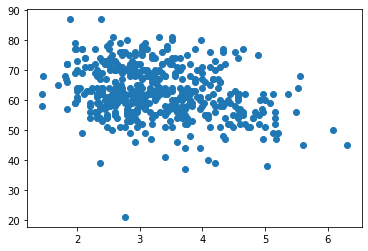

In [11]:
import matplotlib.pyplot as plt

plt.scatter(data_set[:, 2], data_set[:, -2])
plt.show()

In [12]:
x = data_set[:, :17]
y = data_set[:, 17]

y

array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [13]:
x[:10, :6]

array([[293.  ,   1.  ,   3.8 ,   2.8 ,   0.  ,   0.  ],
       [  1.  ,   2.  ,   2.88,   2.16,   1.  ,   0.  ],
       [  8.  ,   2.  ,   3.19,   2.5 ,   1.  ,   0.  ],
       [ 14.  ,   2.  ,   3.98,   3.06,   2.  ,   0.  ],
       [ 17.  ,   2.  ,   2.21,   1.88,   0.  ,   0.  ],
       [ 18.  ,   2.  ,   2.96,   1.67,   0.  ,   0.  ],
       [ 35.  ,   2.  ,   2.76,   2.2 ,   1.  ,   0.  ],
       [ 42.  ,   2.  ,   3.24,   2.52,   1.  ,   0.  ],
       [ 65.  ,   2.  ,   3.15,   2.76,   1.  ,   0.  ],
       [111.  ,   2.  ,   4.48,   4.2 ,   0.  ,   0.  ]])

위 데이터가 인풋 데이터

In [17]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Dense(30, input_dim = 17, activation = 'relu'))                   
# Dense 레이어 : 꽉 차있는 레이어,   30개의 노드, 17 개의 x, relu 함수       -> 히든 데이터

model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 30)                540       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


- dense_1 (nod)에서 540개 인 이유는 17개의 input에서 30개의 노드(hidden)에 연결된 수 (17*30) + b(바이어스)의 수(히든의 수 30개) = 540

- dense_2 (output)에서 31개 인 이유는 30개의 노드에서 연결된 수 + b(바이어스)의 수 = 31

In [18]:
# parameter estimation, w, b

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = 'accuracy')

model.fit(x, y, epochs = 100, batch_size = 50)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 4.4448 - accuracy: 0.6979
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 3.5347 - accuracy: 0.6489
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 2.8312 - accuracy: 0.6319
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 2.0261 - accuracy: 0.6404
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 1.1931 - accuracy: 0.6511
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5956 - accuracy: 0.7255
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.8404
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.8511
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.8511
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.8511
Epoch 11/

10/10 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8532
Epoch 84/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4198 - accuracy: 0.8574
Epoch 85/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.8532
Epoch 86/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3972 - accuracy: 0.8489
Epoch 87/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8511
Epoch 88/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8553
Epoch 89/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.8596
Epoch 90/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8489
Epoch 91/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3900 - accuracy: 0.8532
Epoch 92/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3961 - accuracy: 0.8511
Epoch 93/100


85%를 구분할 수 있다.

- activation : 다음 층으로 어떻게 값을 넘길지 결정하는 부분. rele()와 sigmoid() 함수를 가장 많이 사용.

- loss : 한 번 신경망이 실행될 때마다 오차 값을 추적하는 함수.

- optimizer : 오차를 어떻게 줄여 나갈지 정하는 함수.